In [1]:
import keras
import matplotlib.pyplot as plt

import numpy as np

import scipy.io
X=np.load('input.npy')
Y=np.load('output.npy')

for m in range (0,len(X)):
    l=max(X[m])
    X[m] /=l

X.shape

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y ,
                                                    test_size=0.3,
                                                    random_state=42)

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

#model
model = Sequential()
model.add(Dense(64, input_dim=90, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.001), 'binary_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


ModuleNotFoundError: No module named 'sklearn'

In [2]:
h=model.fit(X_train, y_train, epochs=100)
from sklearn.metrics import accuracy_score
Y_pred = model.predict_classes(X)

Epoch 1/100
636/636 [==============================] - 0s 293us/step - loss: 0.4890 - acc: 0.7925
Epoch 2/100
636/636 [==============================] - 0s 87us/step - loss: 0.2591 - acc: 0.9638
Epoch 3/100
636/636 [==============================] - 0s 88us/step - loss: 0.1879 - acc: 0.9638
Epoch 4/100
636/636 [==============================] - 0s 72us/step - loss: 0.1526 - acc: 0.9654
Epoch 5/100
636/636 [==============================] - 0s 84us/step - loss: 0.1355 - acc: 0.9638
Epoch 6/100
636/636 [==============================] - 0s 78us/step - loss: 0.1229 - acc: 0.9654
Epoch 7/100
636/636 [==============================] - 0s 79us/step - loss: 0.1137 - acc: 0.9654
Epoch 8/100
636/636 [==============================] - 0s 80us/step - loss: 0.1050 - acc: 0.9686
Epoch 9/100
636/636 [==============================] - 0s 64us/step - loss: 0.1054 - acc: 0.9701
Epoch 10/100
636/636 [==============================] - 0s 83us/step - loss: 0.1266 - acc: 0.9638
Epoch 11/100
636/636 [======

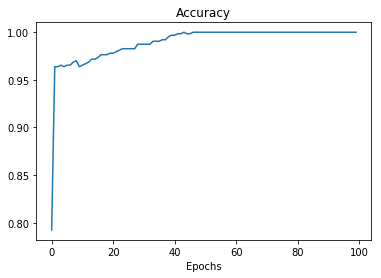

In [3]:
plt.plot(h.history['acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [4]:
print("The Accuracy score on the train set is:\t{:0.3f}".format(accuracy_score(Y, Y_pred)))

The Accuracy score on the train set is:	0.987


In [5]:
model.evaluate(X_test, y_test)

273/273 [==============================] - 0s 94us/step


[0.26361209903621957, 0.95604395604395609]

In [6]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.95604395604395609